# Overview

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.



link: https://www.kaggle.com/harlfoxem/housesalesprediction

# Imports

In [27]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

# Loading Data

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Exploration


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df_raw.drop(['id','date','price'], axis = 1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
list(df_raw.drop(['id','date','price'], axis = 1).columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

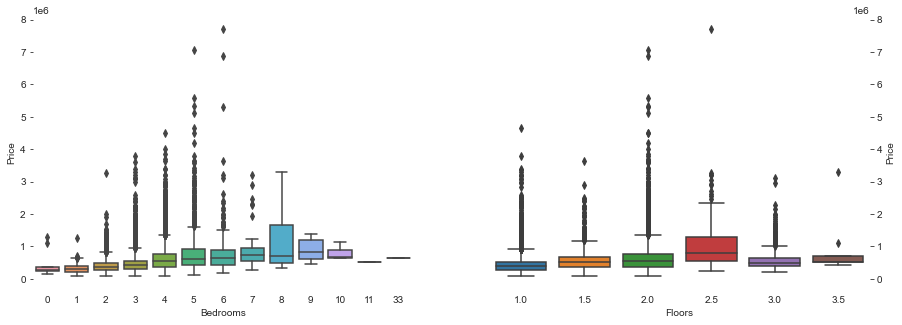

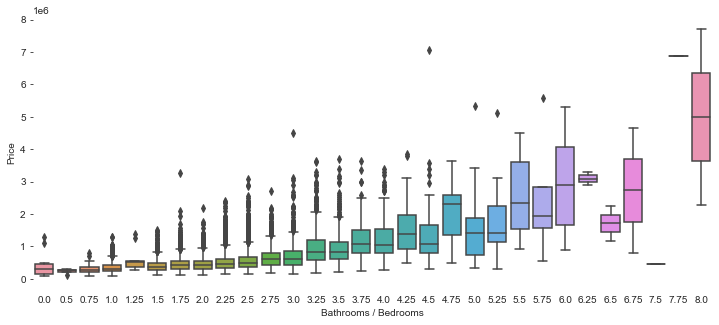

In [28]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df_raw['bedrooms'],y=df_raw['price'], ax=axes[0])
sns.boxplot(x=df_raw['floors'],y=df_raw['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df_raw['bathrooms'],y=df_raw['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

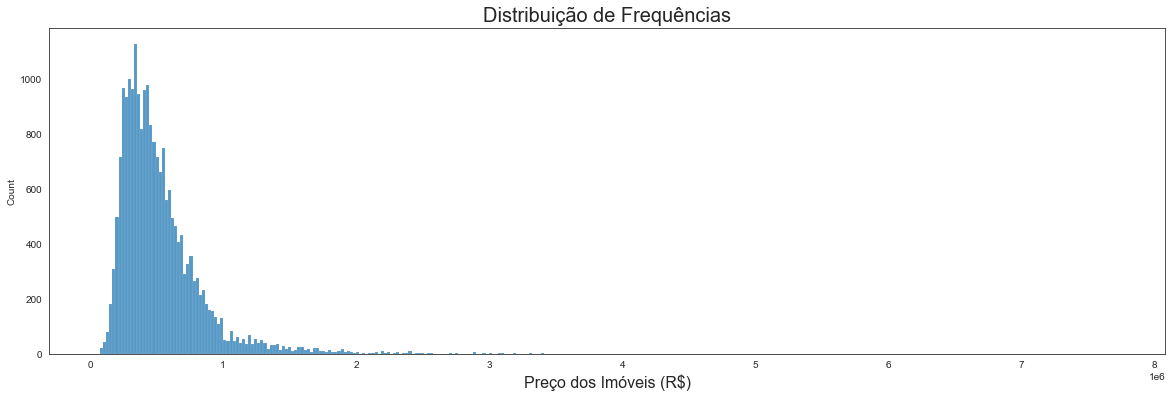

In [29]:
ax = sns.histplot(df_raw['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax = ax

<AxesSubplot:>

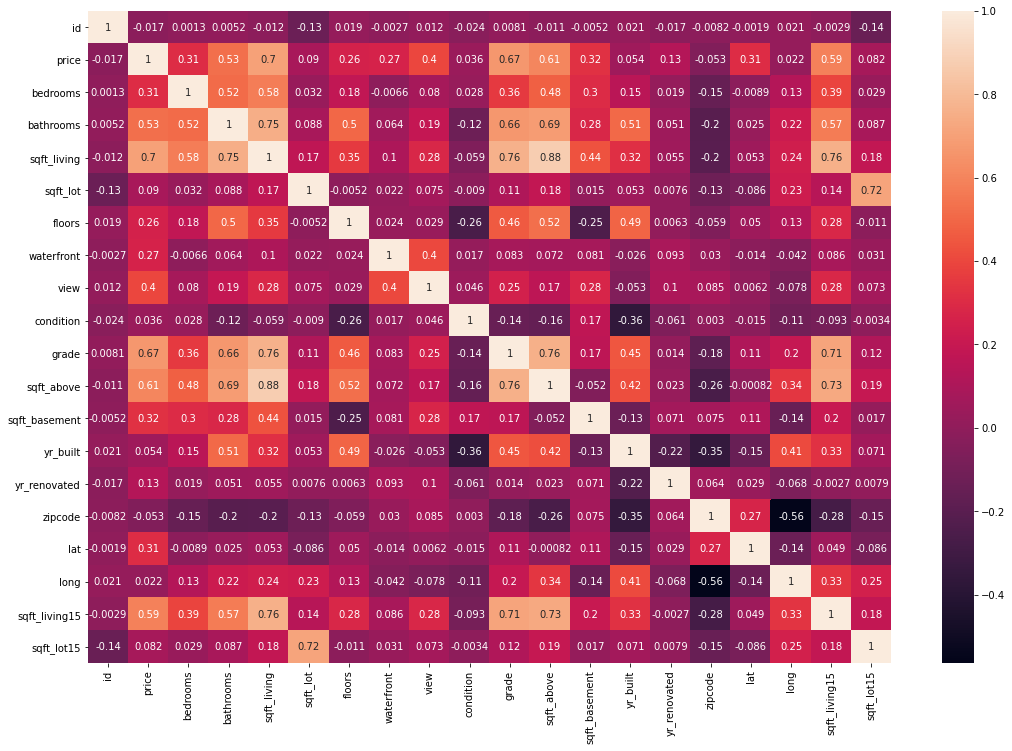

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df_raw.corr(), annot = True)

# Data Preparation

In [153]:
#features
df = df_raw.drop(['date','sqft_lot','condition', 'yr_built', 'zipcode','long','sqft_lot15'], axis = 1)

# response variable
label = df_raw['price'].copy()


In [154]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_living15'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

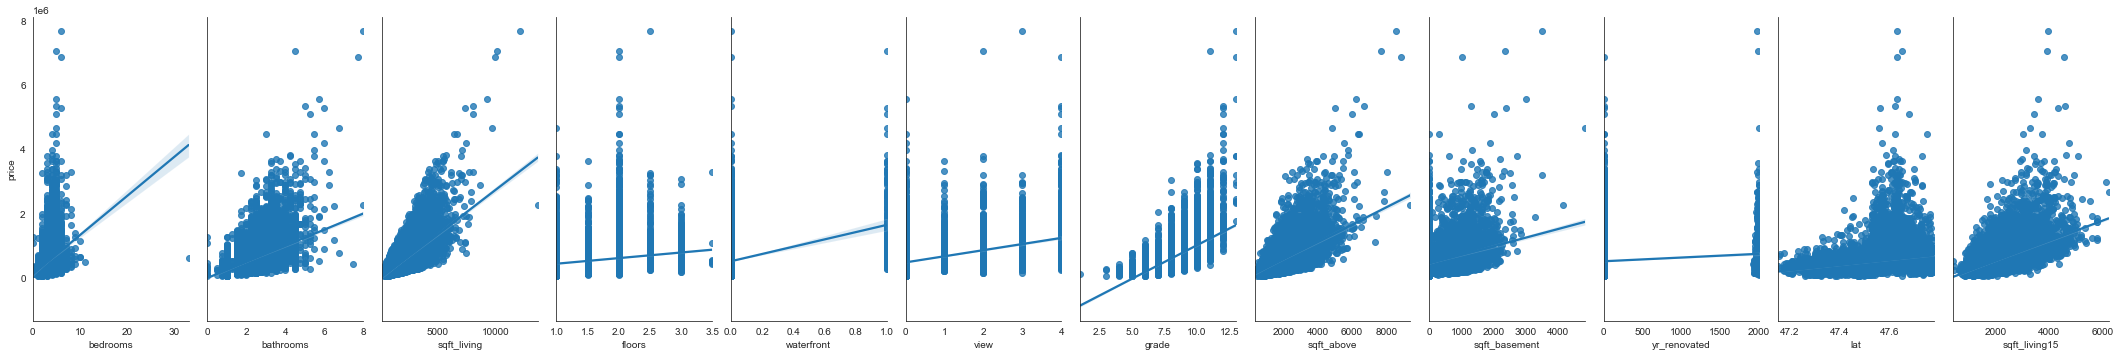

In [155]:
plt.figure(figsize = (18,12))
sns.pairplot(data = df, y_vars = ['price'], x_vars = [ 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15'], kind = 'reg', height = 5, aspect = 0.5)

In [207]:
df['log_price'] = np.log(df['price'] + 1)
df['log_bedrooms'] = np.log(df['bedrooms'] + 1)
df['log_bathrooms'] = np.log(df['bathrooms'] + 1)
df['log_sqft_living'] = np.log(df['sqft_living'] + 1)
df['log_floors'] = np.log(df['floors'] + 1)
df['log_sqft_above'] = np.log(df['sqft_above'] + 1)
df['log_sqft_basement'] = np.log(df['sqft_basement'] + 1)
df['log_sqft_living15'] = np.log(df['sqft_living15'] + 1)


In [209]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_living15', 'log_price', 'log_bedrooms',
       'log_bathrooms', 'log_sqft_living', 'log_sqft_above',
       'log_sqft_basement', 'log_sqft_living15', 'log_floors'],
      dtype='object')

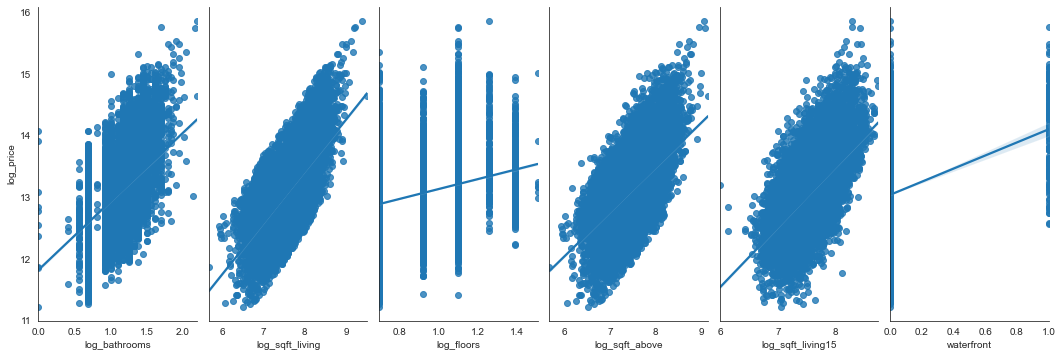

In [217]:
sns.pairplot(data = df, y_vars = ['log_price'], x_vars = ['log_bathrooms',
       'log_sqft_living','log_floors', 'log_sqft_above',
       'log_sqft_living15','waterfront'], kind = 'reg', height = 5, aspect = 0.5)

In [218]:
new_features = ['log_bathrooms',
       'log_sqft_living', 'log_sqft_above',
       'log_sqft_living15', 'log_floors','waterfront']
new_label = 'log_price'

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21613 non-null  int64  
 1   price              21613 non-null  float64
 2   bedrooms           21613 non-null  int64  
 3   bathrooms          21613 non-null  float64
 4   sqft_living        21613 non-null  int64  
 5   floors             21613 non-null  float64
 6   waterfront         21613 non-null  int64  
 7   view               21613 non-null  int64  
 8   grade              21613 non-null  int64  
 9   sqft_above         21613 non-null  int64  
 10  sqft_basement      21613 non-null  int64  
 11  yr_renovated       21613 non-null  int64  
 12  lat                21613 non-null  float64
 13  sqft_living15      21613 non-null  int64  
 14  log_price          21613 non-null  float64
 15  log_bedrooms       21613 non-null  float64
 16  log_bathrooms      216

# Model Training 1

In [161]:
from sklearn.model_selection import train_test_split

In [219]:
#features
features = df_raw.drop(['price', 'date','sqft_lot','condition', 'yr_built', 'zipcode','long','sqft_lot15'], axis = 1)

# response variable
label = df_raw['price'].copy()


X_train, X_test, y_train, y_test = train_test_split( features, label, test_size=0.33, random_state=42)

# model description
model_lr = lm.LinearRegression()

model_lr = model_lr.fit(X_train, y_train)

In [220]:
# prediction 

pred = model_lr.predict(X_test)

In [221]:
from sklearn.model_selection import cross_validate
resultado = cross_validate(model_lr, features, label, cv=10)
mean_accuracy_test = sum(resultado["test_score"])/len(resultado["test_score"])

print(f"Média do teste: {mean_accuracy_test}")

Média do teste: 0.6579648144063783


# Model Training 2

In [222]:
#features
features = df[new_features]

# response variable
label = df['log_price'].copy()


X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=41)

# model description
model_lr = lm.LinearRegression()

model_lr = model_lr.fit(X_train, y_train)

In [223]:
# prediction 

pred = model_lr.predict(X_test)

# Performance Metrics

In [224]:
from sklearn.model_selection import cross_validate
resultado = cross_validate(model_lr, features, label, cv=10)
mean_accuracy_test = sum(resultado["test_score"])/len(resultado["test_score"])

print(f"Média do teste: {mean_accuracy_test}")

Média do teste: 0.49591401312655325


In [225]:
pd.DataFrame(resultado)

,fit_time,score_time,test_score
0,0.008002,0.003002,0.520431
1,0.006164,0.002836,0.511470
2,0.007001,0.002012,0.483545
3,0.005000,0.002000,0.505298
4,0.008003,0.002000,0.450491
5,0.006001,0.003004,0.513209
6,0.006001,0.001998,0.498477
7,0.005000,0.003002,0.521671
8,0.006002,0.001999,0.506796
9,0.004999,0.002002,0.447752


In [226]:
import statsmodels.api as sm

In [227]:
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2366.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:23:36   Log-Likelihood:                -6218.7
No. Observations:               14480   AIC:                         1.245e+04
Df Residuals:                   14473   BIC:                         1.250e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.8450      0.085     68.994      0.000       5.679       6.011
log_bathrooms        -0.0502      0.021     -2.422      0.015      -0.091      -0.010
log_sqft_living       0.7240      0.018     39.153      0.000       0.688       0.760
log_sqft_above       -0.1914      0.017    -11.041      0.000      -0.225      -0.157
log_sqft_living15     0.3892      0.014     26.878      0.000       0.361       0.418
log_floors            0.2987      0.020     14.783      0.000       0.259       0.338
waterfront            0.6916      0.036     19.164      0.000       0.621       0.762
==============================================================================
Omnibus:                       63.726   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.337
Skew:                           0.106   Prob(JB):                     5.84e-13
Kurtosis:                       2.780   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
min(y_test.values)

11.289794413577894

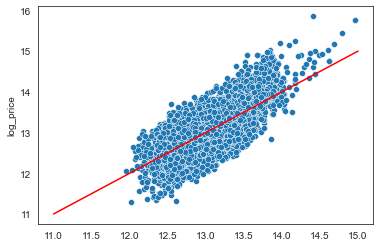

In [229]:
minimun = int(min(y_test.values))
maximum = int(max(y_test.values))

ax = sns.scatterplot(pred, y_test)
ax = sns.lineplot([minimun, maximum], [minimun, maximum], color = 'r')

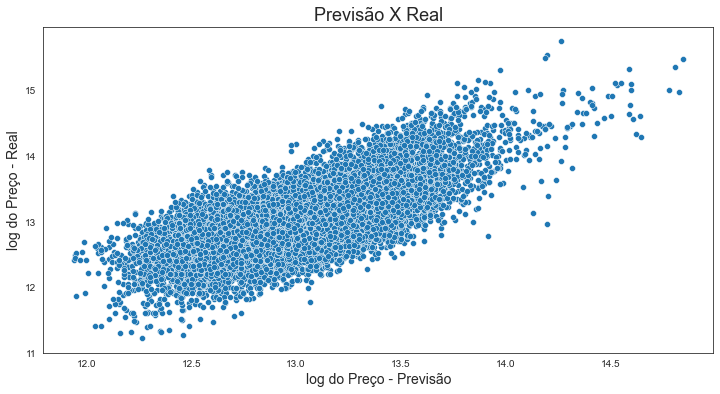

In [230]:
y_previsto_train = model_lr.predict(X_train)

ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax = ax

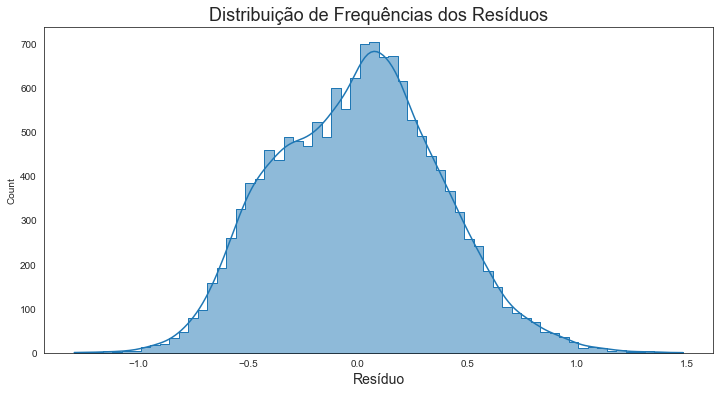

In [231]:
residuo = y_train - y_previsto_train

ax = sns.histplot(residuo, kde = True, element='step')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Resíduo', fontsize=14)
ax = ax

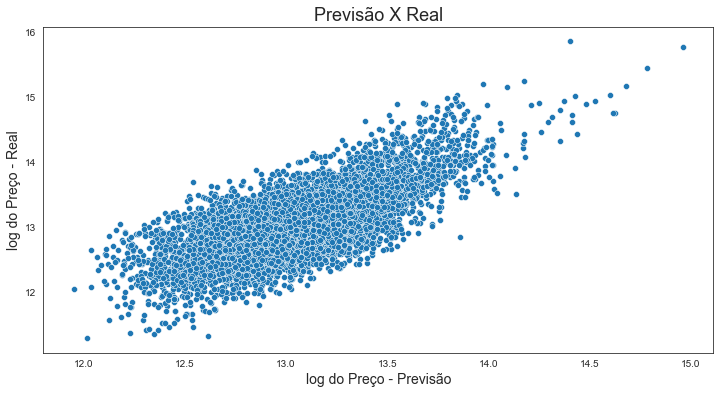

In [232]:
y_previsto_teste = model_lr.predict(X_test)

ax = sns.scatterplot(x = y_previsto_teste, y = y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax = ax

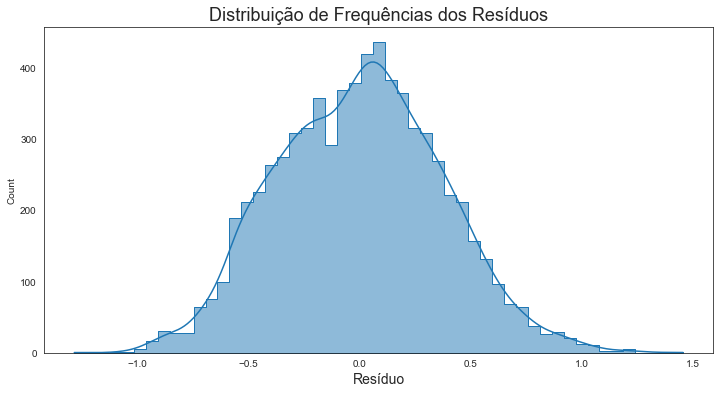

In [233]:
residuo = y_test - y_previsto_teste

ax = sns.histplot(residuo, kde = True, element='step')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Resíduo', fontsize=14)
ax = ax

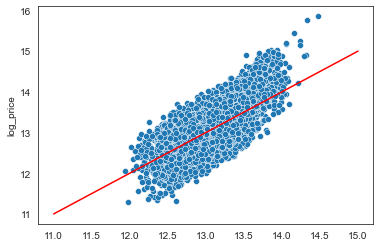

In [177]:
minimun = int(min(y_test))
maximum = int(max(y_test))

ax = sns.scatterplot(pred, y_test)
ax = sns.lineplot([minimun, maximum], [minimun, maximum], color = 'r')

In [178]:
df1 = df.copy()

In [193]:
pred = np.exp(model_lr.predict(df[new_features]))

In [194]:
df1['prediction'] = pred

In [195]:
df1[['id','price','prediction']]

,id,price,prediction
0,7129300520,221900.0,299963.953549
1,6414100192,538000.0,533835.235258
2,5631500400,180000.0,304731.527502
3,2487200875,604000.0,438606.844137
4,1954400510,510000.0,420638.971373
...,...,...,...
21608,263000018,360000.0,378552.607631
21609,6600060120,400000.0,513617.611680
21610,1523300141,402101.0,247178.590905
21611,291310100,400000.0,376884.219303


In [196]:
df1['error'] = df1['price'] - df1['prediction']

In [197]:
df1[['id','price','prediction','error']].head()

,id,price,prediction,error
0,7129300520,221900.0,299963.953549,-78063.953549
1,6414100192,538000.0,533835.235258,4164.764742
2,5631500400,180000.0,304731.527502,-124731.527502
3,2487200875,604000.0,438606.844137,165393.155863
4,1954400510,510000.0,420638.971373,89361.028627


In [198]:
df1['error_abs'] = np.abs(df1['error'])

In [199]:
# mean absolute error
mae = df1['error_abs'].mean()

print('MAE: ', round(mae, 2))

MAE:  165064.89


In [200]:
df1['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

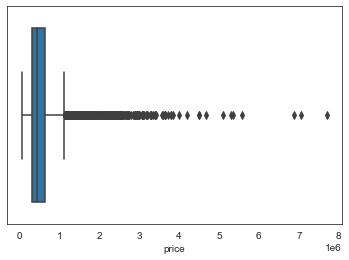

In [201]:
sns.boxplot(df1['price'].round(2), orient = 'v')

In [202]:
df1['error_perc'] = (df1['price'] - df1['prediction'])/(df1['price'])

In [203]:
df1[['id','price','prediction','error','error_perc']].head()

,id,price,prediction,error,error_perc
0,7129300520,221900.0,299963.953549,-78063.953549,-0.351798
1,6414100192,538000.0,533835.235258,4164.764742,0.007741
2,5631500400,180000.0,304731.527502,-124731.527502,-0.692953
3,2487200875,604000.0,438606.844137,165393.155863,0.273830
4,1954400510,510000.0,420638.971373,89361.028627,0.175218


In [204]:
df1['error_perc_abs'] = np.abs(df1['error_perc'])

In [205]:
df1[['id','price','prediction','error','error_perc', 'error_perc_abs']].head()

,id,price,prediction,error,error_perc,error_perc_abs
0,7129300520,221900.0,299963.953549,-78063.953549,-0.351798,0.351798
1,6414100192,538000.0,533835.235258,4164.764742,0.007741,0.007741
2,5631500400,180000.0,304731.527502,-124731.527502,-0.692953,0.692953
3,2487200875,604000.0,438606.844137,165393.155863,0.273830,0.273830
4,1954400510,510000.0,420638.971373,89361.028627,0.175218,0.175218


In [206]:
# mean absolute percentage error
mape = df1['error_perc_abs'].mean()

print('MAPE: ', round(mape*100,2),'%')

MAPE:  31.95 %
